In [2]:
import terratorch
from terratorch.registry import BACKBONE_REGISTRY, TERRATORCH_BACKBONE_REGISTRY, TERRATORCH_DECODER_REGISTRY, FULL_MODEL_REGISTRY
import torch
import config
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.io import read_image
import rasterio as rs
from torchvision import transforms
import numpy as np

In [3]:
output_modality = "NDVI"

In [4]:
model_gen = FULL_MODEL_REGISTRY.build(
    'terramind_v1_base_generate',
    modalities=['S2L1C', 'S1GRD'],  # Define the input
    output_modalities=[output_modality],  # Define the output from S2L2A, S1GRD, S1RTC, DEM, LULC, and NDVI
    pretrained=True,
    standardize=True,  # If standardize=True, you don't need to do the standardization yourself.
    # offset={'S2L2A': 1000}  # Optional offset in your data. The offset is also applied to the generation. 
)

In [5]:
with open(r"C:\Users\KenzoBounegta\SegSat\Sen1Floods11-Benchmark\dataset\sen1floods11_v1.1\sen1floods11_v1.1\data\S2L1CHand\Sri-Lanka_163406_S2Hand.tif", 'rb') as file:
    S2_test = torch.from_numpy(rs.open(file).read())


S2_test = transforms.Resize((224,224))(S2_test).unsqueeze(0)
# S2_test = torch.randn((1,13,224,224)
print(S2_test.shape)
S1_test = torch.randn((1,2,224,224))
test_tensor_gen = {"S2L1C": S2_test, "S1GRD": S1_test}

torch.Size([1, 13, 224, 224])


In [6]:
output_gen = model_gen(test_tensor_gen)[output_modality]

In [7]:


S2_test = S2_test.squeeze(0).numpy()
print(S2_test.shape)
red = S2_test[4,:,:]

green = S2_test[3,:,:]
blue = S2_test[2,:,:]
rgb = np.stack((red, green, blue))
min_rgb, max_rgb = np.percentile(rgb, (2, 98), axis=(1, 2), keepdims=True)
normalized_rgb = (rgb - min_rgb) / (max_rgb - min_rgb)

(13, 224, 224)


In [8]:
S2_test.shape,normalized_rgb.shape

((13, 224, 224), (3, 224, 224))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27332028701891714..4.393700787401575].


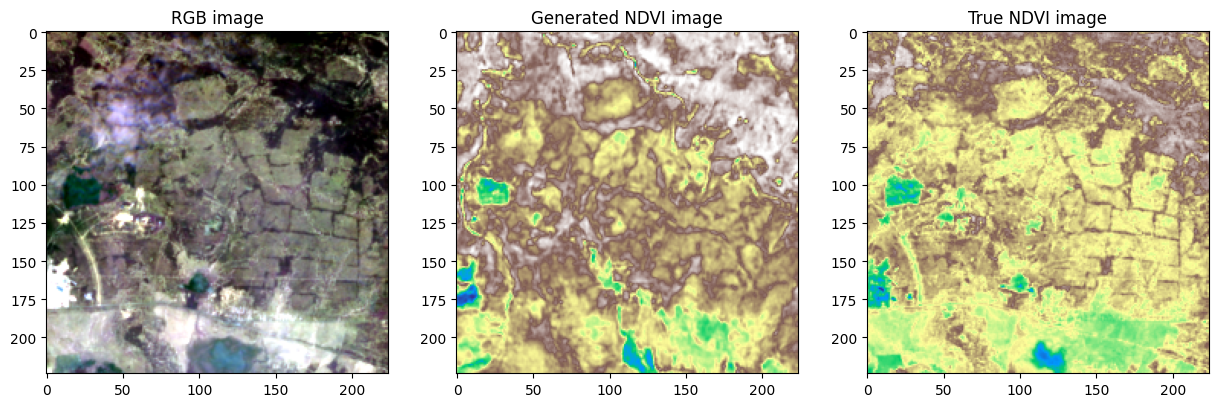

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(normalized_rgb.transpose(1,2,0))
plt.title("RGB image")
plt.subplot(1,3,2)
plt.title(f"Generated {output_modality} image")
plt.imshow(output_gen[0].detach().numpy().transpose(1,2,0), cmap='terrain')
plt.subplot(1,3,3)
plt.title(("True NDVI image"))
plt.imshow((S2_test[7,:,:]-S2_test[3,:,:])/(S2_test[7,:,:]+S2_test[3,:,:]), cmap='terrain')
plt.show()